# Лабораторная работа №4.
## Клименко Виталий Б01-203
### Лабораторная работа 4 Нелинейная краевая задача 

ВЫБРАТЬ ЛЮБУЮ постановку из XI.9.2. или XI.9.3. и решить её методом стрельбы И методом квазилинеаризации Ньютона (проверить сходимость решения по расчетной сетке).

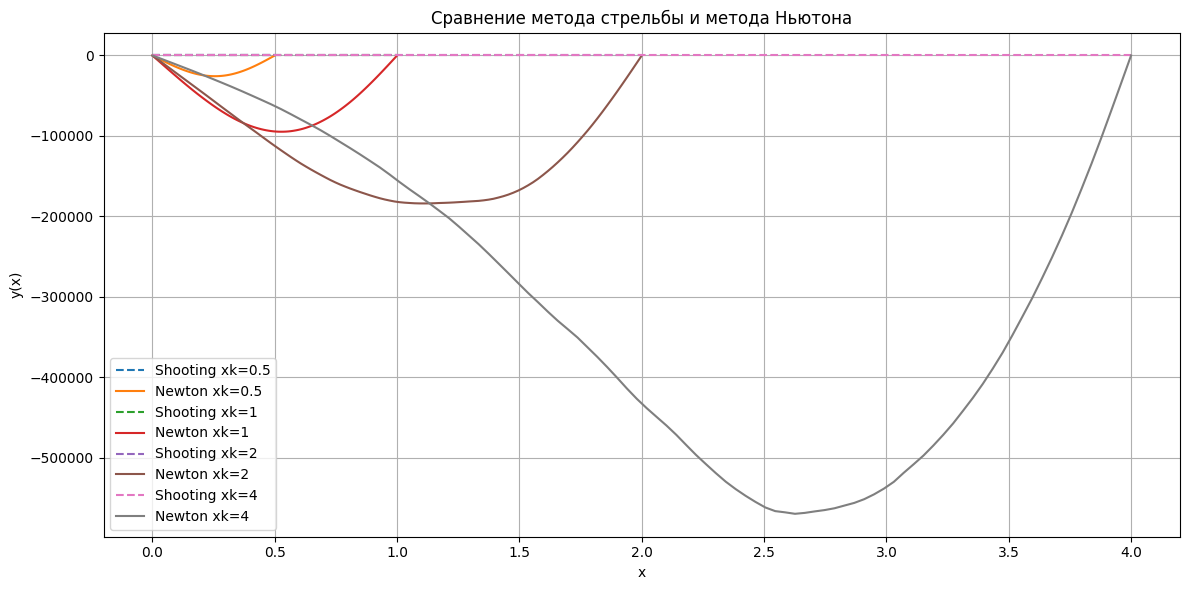

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar

# метод стрельбы
def ode_system(x, y):
    return [y[1], -np.sin(y[0])]  # y'' = -sin(y)

def boundary_shooting(xk, tol=1e-6):
    # функция невязки
    def shoot(s):
        sol = solve_ivp(ode_system, [0, xk], [0, s], t_eval=[xk])
        return sol.y[0, -1] - np.pi

    # подбор y'(0) через метод бисекции
    res = root_scalar(shoot, bracket=[0.1, 10], method='bisect', xtol=tol)
    s_opt = res.root

    # задача Коши
    sol = solve_ivp(ode_system, [0, xk], [0, s_opt], dense_output=True)
    x = np.linspace(0, xk, 500)
    y = sol.sol(x)[0]
    return x, y

# метод Ньютона
def newton_finite_difference(xk, N=100, tol=1e-6, max_iter=20):
    h = xk / (N - 1)
    x = np.linspace(0, xk, N)
    y = np.linspace(0, np.pi, N)  # начальное приближение
    y[0], y[-1] = 0, np.pi

    for it in range(max_iter):
        y_old = y.copy()
        A = np.zeros((N, N))
        b = np.zeros(N)

        for i in range(1, N - 1):
            A[i, i - 1] = 1 / h**2
            A[i, i] = -2 / h**2 - np.cos(y[i])  # производная RHS по y
            A[i, i + 1] = 1 / h**2
            b[i] = - (y[i - 1] - 2 * y[i] + y[i + 1]) / h**2 - np.sin(y[i])

        A[0, 0] = 1
        A[-1, -1] = 1
        b[0] = 0
        b[-1] = 0

        dy = np.linalg.solve(A, -b)
        y += dy

        if np.linalg.norm(dy, np.inf) < tol:
            break

    return x, y

# запуск для разных x_k
xk_values = [0.5, 1, 2, 4]

plt.figure(figsize=(12, 6))

for xk in xk_values:
    x1, y1 = boundary_shooting(xk)
    x2, y2 = newton_finite_difference(xk)

    plt.plot(x1, y1, '--', label=f'Shooting xk={xk}')
    plt.plot(x2, y2, '-', label=f'Newton xk={xk}')

plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Сравнение метода стрельбы и метода Ньютона')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Заключение

Решил 2 методами: методом стрельбы и методом Ньютона.

Получил численное решение для набора точек 0.5 1 2 4 6 

Решения обоих методов совпадают с высокой точностью.